In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r'D:\books for study\Kaggle works\Telecom customer churn classification\WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
df = df.drop(columns=['customerID'])

In [7]:
df.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
print("Original Data:")
print(df.head())
print("\nData Types:")
print(df.info())


label_encoder = LabelEncoder()


categorical_columns = df.select_dtypes(include=['object']).columns


for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])


print("\nLabel Encoded Data:")
print(df.head())





Original Data:
   gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Ye

In [9]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


In [10]:
scaler = MinMaxScaler()


numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns


df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


In [11]:
df.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0.0,1,0,0.013889,0,1,0,0,2,0,0,0,0,0,1,2,0.115423,2505,0
1,1,0.0,0,0,0.472222,1,0,0,2,0,2,0,0,0,1,0,3,0.385075,1466,0
2,1,0.0,0,0,0.027778,1,0,0,2,2,0,0,0,0,0,1,3,0.354229,157,1
3,1,0.0,0,0,0.625000,0,1,0,2,0,2,2,0,0,1,0,0,0.239303,1400,0
4,0,0.0,0,0,0.027778,1,0,1,0,0,0,0,0,0,0,1,2,0.521891,925,1
5,0,0.0,0,0,0.111111,1,2,1,0,0,2,0,2,2,0,1,2,0.809950,6104,1
6,1,0.0,0,1,0.305556,1,2,1,0,2,0,0,2,0,0,1,1,0.704975,1550,0
7,0,0.0,0,0,0.138889,0,1,0,2,0,0,0,0,0,0,0,3,0.114428,2609,0
8,0,0.0,1,0,0.388889,1,2,1,0,0,2,2,2,2,0,1,2,0.861194,2646,1
9,1,0.0,0,1,0.861111,1,0,0,2,2,0,0,0,0,1,0,0,0.377114,3022,0


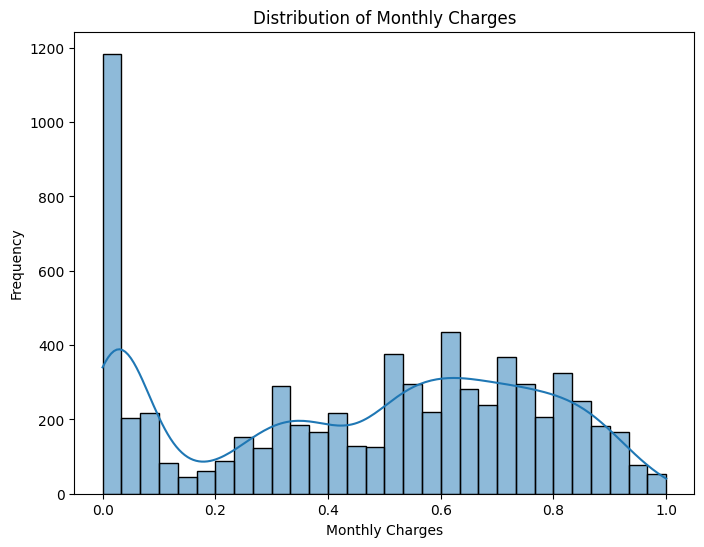

In [12]:
plt.figure(figsize=(8, 6))
sns.histplot(df['MonthlyCharges'], bins=30, kde=True)
plt.title('Distribution of Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.show()


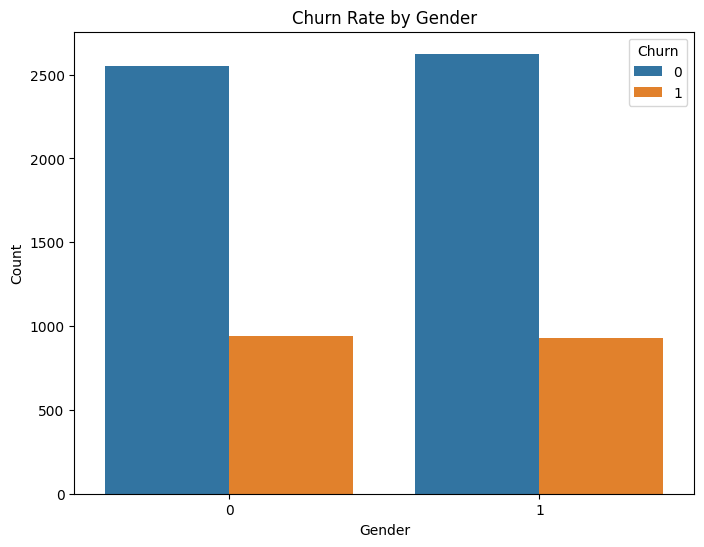

In [13]:
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', hue='Churn', data=df)
plt.title('Churn Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


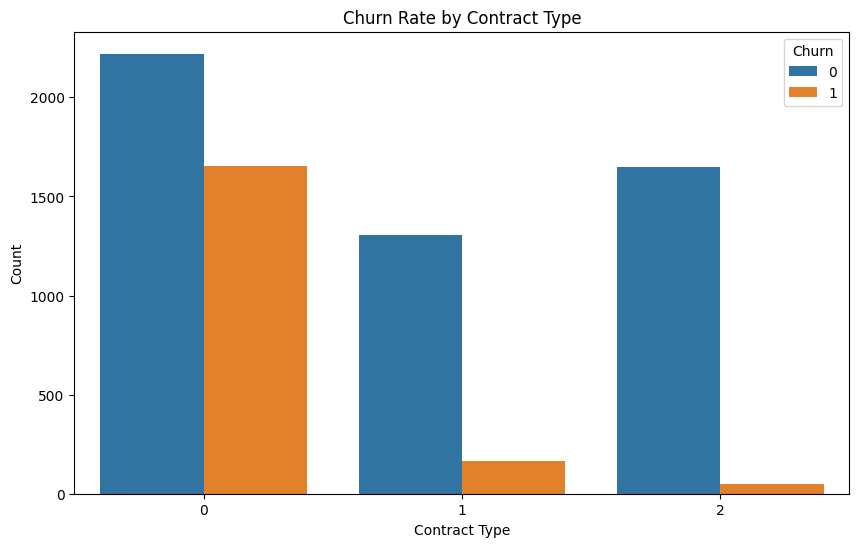

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Churn Rate by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.show()


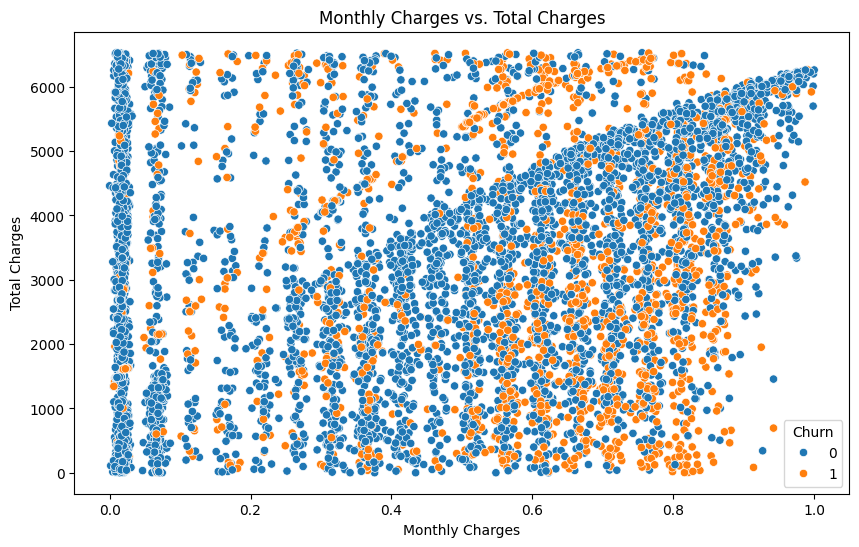

In [15]:
# Convert TotalCharges to numeric, coerce errors
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

plt.figure(figsize=(10, 6))
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', hue='Churn', data=df)
plt.title('Monthly Charges vs. Total Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')
plt.show()


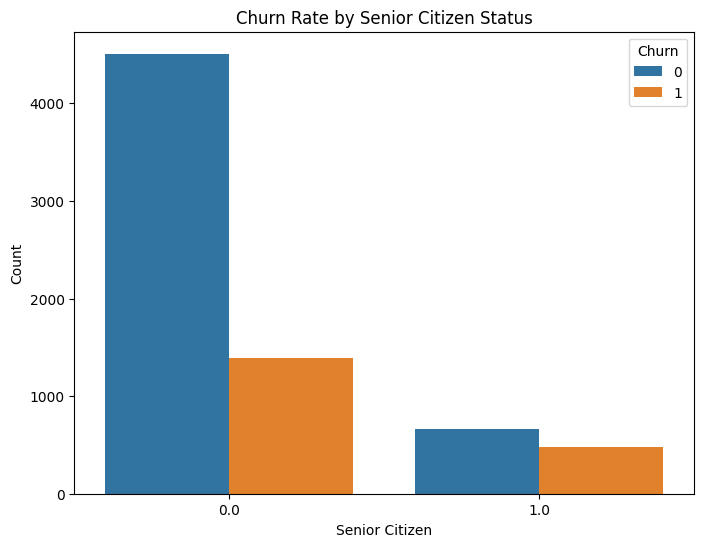

In [16]:
plt.figure(figsize=(8, 6))
sns.countplot(x='SeniorCitizen', hue='Churn', data=df)
plt.title('Churn Rate by Senior Citizen Status')
plt.xlabel('Senior Citizen')
plt.ylabel('Count')
plt.show()


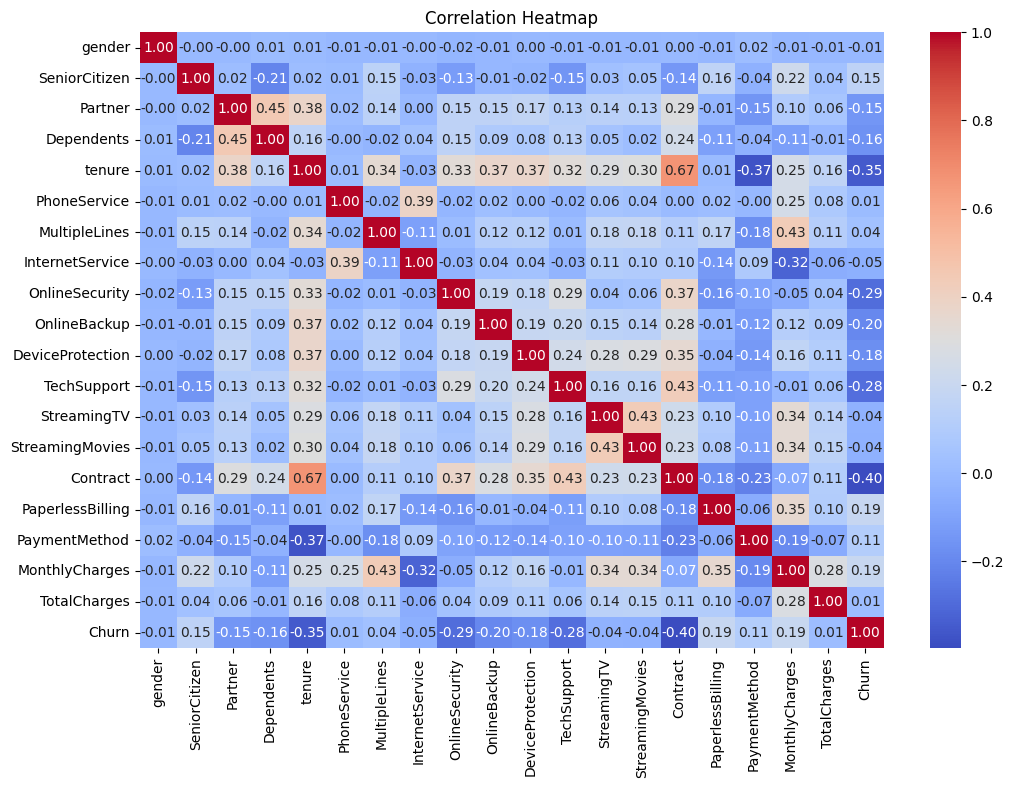

In [17]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


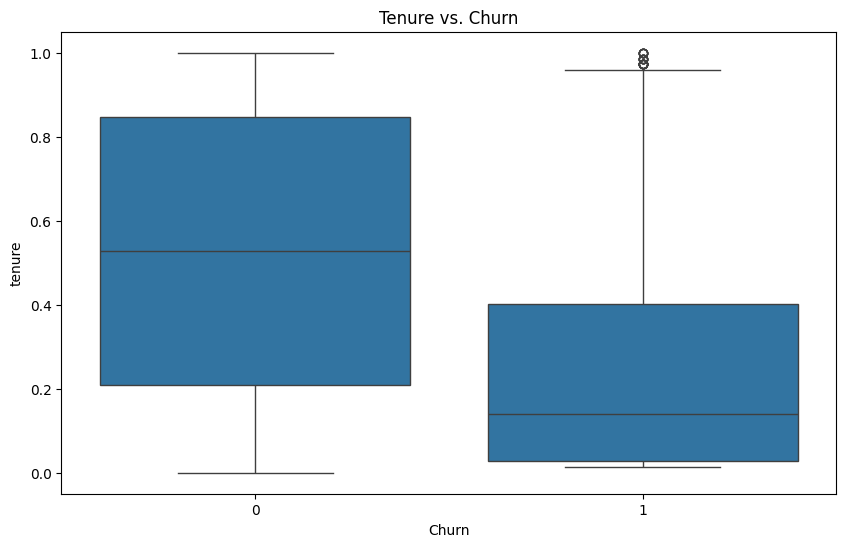

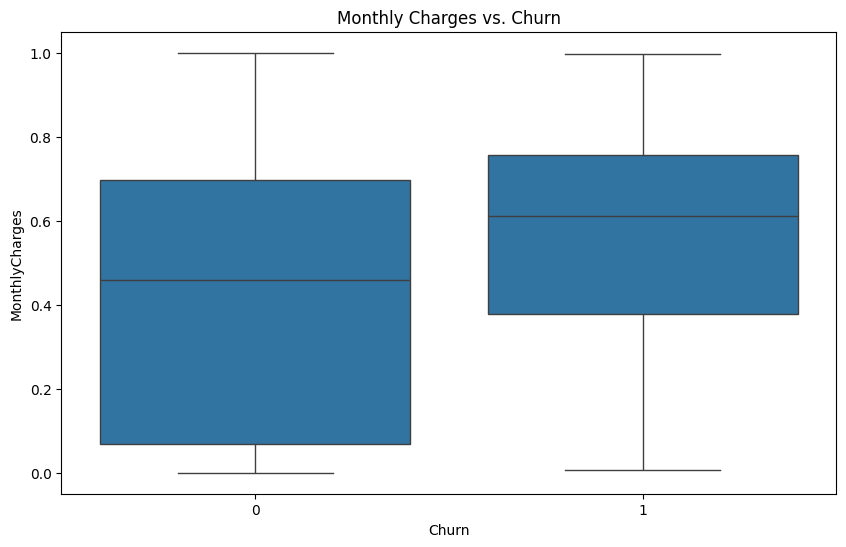

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Tenure vs. Churn')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges vs. Churn')
plt.show()


In [19]:
X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Machine': SVC(probability=True),
    'K-Nearest Neighbors': KNeighborsClassifier()
}


for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    print(f"Model: {model_name}")
    print(classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"ROC-AUC: {roc_auc_score(y_test, y_proba)}")
    print("\n")


param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=3, scoring='roc_auc')
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best ROC-AUC score: {grid_search.best_score_}")


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1036
           1       0.65      0.54      0.59       373

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.79      0.80      0.79      1409

Accuracy: 0.801277501774308
ROC-AUC: 0.8462701978117528


Model: Random Forest
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.48      0.55       373

    accuracy                           0.80      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.80      0.78      1409

Accuracy: 0.7955997161107168
ROC-AUC: 0.8337866303683998


Model: Gradient Boosting
              precision    recall  f1-score   support

           0       0.84      0.91      0.88      1036
           1       0.69      0.53      0.60    

C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model: K-Nearest Neighbors
              precision    recall  f1-score   support

           0       0.76      0.88      0.82      1036
           1       0.42      0.23      0.30       373

    accuracy                           0.71      1409
   macro avg       0.59      0.56      0.56      1409
weighted avg       0.67      0.71      0.68      1409

Accuracy: 0.7111426543647977
ROC-AUC: 0.6033387849741737


Best parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
Best ROC-AUC score: 0.8384927569220378


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.801277501774308
Random Forest Accuracy: 0.8005677785663591
Gradient Boosting Accuracy: 0.8112136266855926
Support Vector Machine Accuracy: 0.7352732434350603
K-Nearest Neighbors Accuracy: 0.7111426543647977


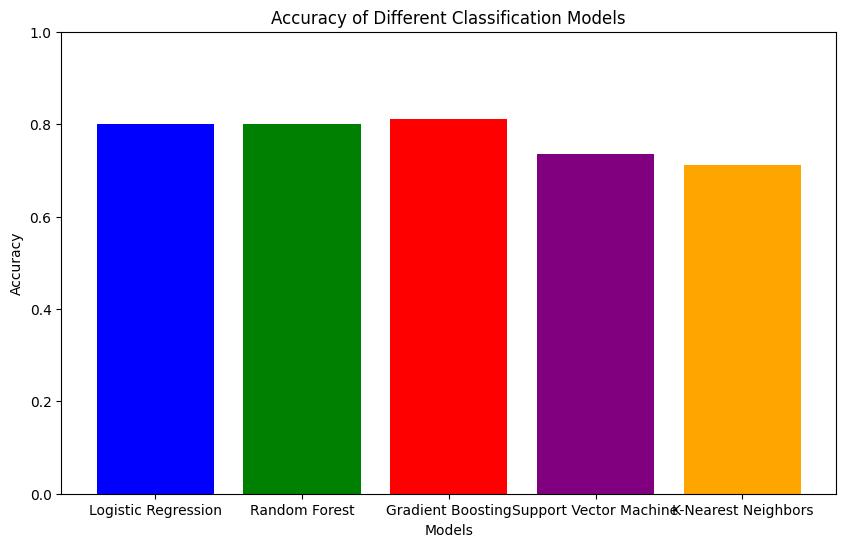

In [20]:
# Dictionary to store accuracies
accuracies = {}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[model_name] = accuracy
    print(f"{model_name} Accuracy: {accuracy}")

# Plot the accuracies
plt.figure(figsize=(10, 6))
plt.bar(accuracies.keys(), accuracies.values(), color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Classification Models')
plt.ylim(0, 1)
plt.show()